<a href="https://colab.research.google.com/github/Timoh-top/logistic-regression-marketing/blob/main/logistic_regression_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [23]:
# Load the dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [ ]:
# Preview data
df.head()

**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Check  null columns
df.info()

In [ ]:
# Target variable distribution
print(df['y'].value_counts())

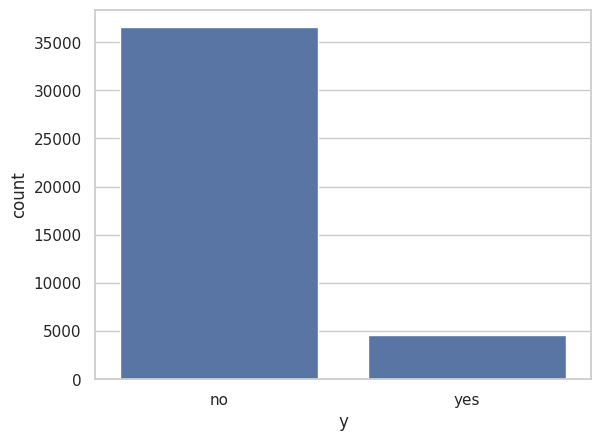

In [24]:
# Visualize target variable distribution
sns.countplot(x='y', data=df)
plt.show()

**DATA PREPROCESSING**

In [ ]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**LOGISTIC REGRESSION MODEL**

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

**EVALUATE THE MODEL**

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

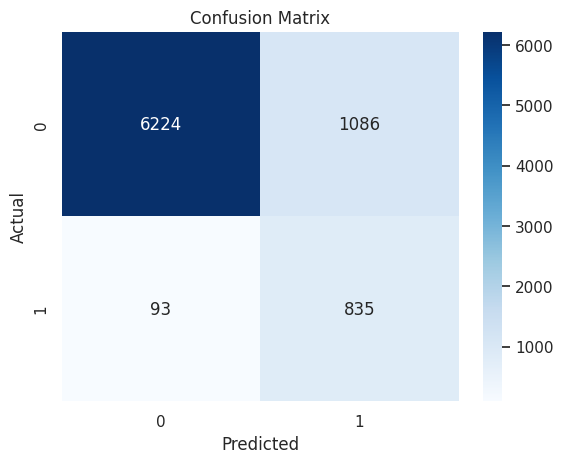

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')

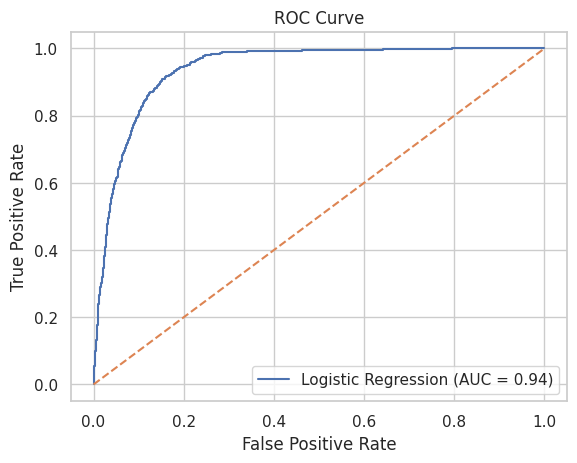

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()